In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

plt.style.use('seaborn-whitegrid')

Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.
Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

In [2]:
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

In [3]:
x1 = np.array(salary)
y1 = np.array(scoring)

In [4]:
b1 = np.cov(x1, y1, ddof=1)[0, 1] / np.var(x1, ddof=1)
b1

2.620538882402765

In [5]:
b0 = y1.mean() - b1 * x1.mean()
b0

444.1773573243596

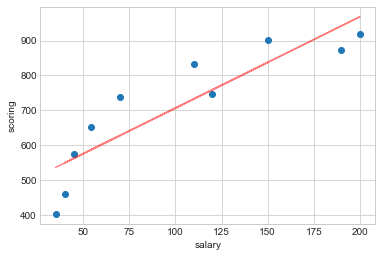

In [6]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring');

In [14]:
z1 = b0 + b1 * x1

print(f'real: {y1[:5]}')
print(f'pred: {z1[:5]}')

real: [401 574 874 919 459]
pred: [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262]


In [15]:
R1 = 1 - (z1 - y1).var() / y1.var()
R1

0.7876386635293686

In [16]:
np.corrcoef(x1, y1) ** 2

array([[1.        , 0.78763866],
       [0.78763866, 1.        ]])

In [17]:
def mean_approximation_error(y_real: np.ndarray, y_pred: np.ndarray) -> float:
    """Средняя ошибка аппроксимации.
    """
    
    return np.abs((y_real - y_pred) / y_real).mean()

In [21]:
mean_approximation_error(y1, z1)

0.11469251843561709

In [22]:
k1 = 1
k2 = 8

F1 = (R1 / k1) / ((1 - R1) / k2)
F1

29.67164085966451

In [24]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

In [25]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [26]:
s_slope = standard_error_slope(x1, y1, z1)
s_slope

0.48108279568516005

In [27]:
alpha = 0.05

t = stats.t.ppf(1 - alpha / 2, df=8)
t

2.3060041350333704

In [28]:
(b1 - t * s_slope, b1 + t * s_slope)

(1.5111599662593718, 3.729917798546158)

In [29]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [30]:
s_intercept = standard_error_intercept(x1, y1, z1)
s_intercept

56.46649755068153

In [31]:
(b0 - t * s_intercept, b0 + t * s_intercept)

(313.9653804816363, 574.3893341670829)

Задача 2

Допустим, первые 5 клиентов из предыдущего задания проживают в Москве, а остальные - в Санкт-Петербурге. Влияет ли этот фактор на значение их кредитного скоринга?

In [37]:
sal1 = salary[0:5]
sco1 = scoring[0:5]
x2 = np.array(sal1)
y2 = np.array(sco1)

In [38]:
b21 = np.cov(x2, y2, ddof=1)[0, 1] / np.var(x2, ddof=1)
b21

2.72834427929485

In [39]:
b20 = y2.mean() - b21 * x2.mean()
b20

367.1088835119253

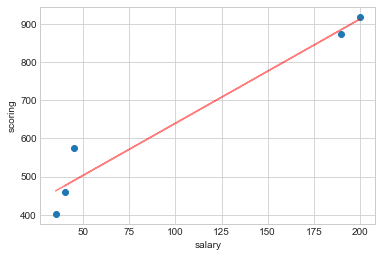

In [40]:
ox = x2
oy = b20 + b21 * ox

plt.scatter(x2, y2)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring');

In [44]:
sal2 = salary[5:]
sco2 = scoring[5:]
x3 = np.array(sal1)
y3 = np.array(sco1)


In [45]:
b31 = np.cov(x3, y3, ddof=1)[0, 1] / np.var(x3, ddof=1)
b31

2.72834427929485

In [46]:
b30 = y3.mean() - b31 * x3.mean()
b30

367.1088835119253

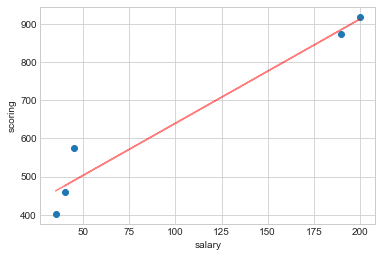

In [73]:
ox = x3
oy = b30 + b31 * ox

plt.scatter(x3, y3)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring');

In [74]:
ox

array([ 35,  45, 190, 200,  40])

ответ: не повлияет

Задача 3

Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:
{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}
По каждой паре выборок посчитайте:
выборочное среднее и дисперсию каждой выборки,
коэффициент корреляции Пирсона и прямую линейной регрессии.
Убедившись в том, что они не практически не отличаются, постройте scatter plot по каждой паре выборок.

In [49]:
X = { "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], 
     "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68], 
     "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], 
     "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74], 
     "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], 
     "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73], 
     "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0], 
     "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89] }

In [57]:
np.mean(X["x1"])

9.0

In [58]:
cov1 = np.cov(X["x1"],X["y1"])
cov1

array([[11.        ,  5.501     ],
       [ 5.501     ,  4.12726909]])

In [62]:
X1 = np.array(X["x1"])
Y1 = np.array(X["y1"])

In [63]:
B1 = np.cov(X1, Y1, ddof=1)[0, 1] / np.var(X1, ddof=1)
B1

0.5000909090909093

In [64]:
B0 = Y1.mean() - B1 * X1.mean()
B0

3.0000909090909094

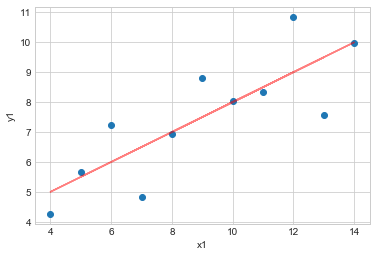

In [76]:
ox = X1
oy = B0 + B1 * ox

plt.scatter(X1, Y1)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('x1')
plt.ylabel('y1');

In [77]:
cov2 = np.cov(X["x2"],X["y2"])
cov2

array([[11.        ,  5.5       ],
       [ 5.5       ,  4.12762909]])

In [78]:
X2 = np.array(X["x2"])
Y2 = np.array(X["y2"])

In [79]:
B2 = np.cov(X2, Y2, ddof=1)[0, 1] / np.var(X2, ddof=1)
B2

0.5000000000000001

In [80]:
B02 = Y2.mean() - B2 * X2.mean()
B02

3.000909090909089

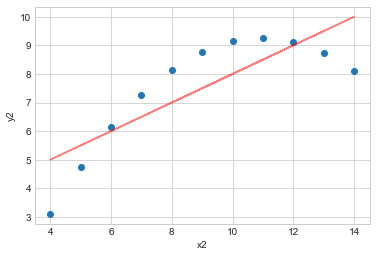

In [81]:
OX2 = X2
OY2 = B02 + B2 * OX2

plt.scatter(X2, Y2)
plt.plot(OX2, OY2, color='red', alpha=0.5)

plt.xlabel('x2')
plt.ylabel('y2');

In [60]:
cov3 = np.cov(X["x3"],X["y3"])
cov3

array([[11.     ,  5.497  ],
       [ 5.497  ,  4.12262]])

In [82]:
X3 = np.array(X["x3"])
Y3 = np.array(X["y3"])

In [83]:
B3 = np.cov(X3, Y3, ddof=1)[0, 1] / np.var(X3, ddof=1)
B3

0.49972727272727285

In [84]:
B03 = Y3.mean() - B3 * X3.mean()
B03

3.002454545454544

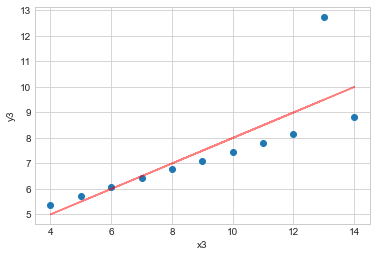

In [85]:
OX3 = X3
OY3 = B03 + B3 * OX3

plt.scatter(X3, Y3)
plt.plot(OX3, OY3, color='red', alpha=0.5)

plt.xlabel('x3')
plt.ylabel('y3');

In [61]:
cov4 = np.cov(X["x4"],X["y4"])
cov4

array([[11.        ,  5.499     ],
       [ 5.499     ,  4.12324909]])

In [86]:
X4 = np.array(X["x4"])
Y4 = np.array(X["y4"])

In [87]:
B4 = np.cov(X4, Y4, ddof=1)[0, 1] / np.var(X4, ddof=1)
B4

0.49990909090909086

In [88]:
B04 = Y4.mean() - B4 * X4.mean()
B04

3.0017272727272735

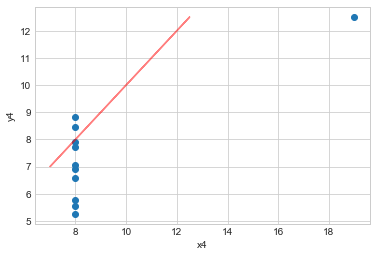

In [89]:
OX4 = X4
OX4 = B04 + B4 * OX4

plt.scatter(X4, Y4)
plt.plot(OX4, OX4, color='red', alpha=0.5)

plt.xlabel('x4')
plt.ylabel('y4');